In [75]:
#run in python 3.10.7 on windows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

auckland_rain  = pd.read_csv('../data/niwa_cleaned/aucklandDailyWeatherData.csv', parse_dates=['Date(NZST)'])
auckland_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date(NZST)             945 non-null    datetime64[ns]
 1   Pmsl(hPa)              945 non-null    float64       
 2   Pstn(hPa)              945 non-null    float64       
 3   Amount(mm)             941 non-null    float64       
 4   Period(min)            945 non-null    float64       
 5   daily_total_rainfall   945 non-null    float64       
 6   daily_avg_duration     945 non-null    float64       
 7   daily_min_duration     945 non-null    float64       
 8   daily_max_duration     945 non-null    float64       
 9   daily_median_duration  945 non-null    float64       
 10  Rainfall(mm)           945 non-null    float64       
 11  Deficit(mm)            945 non-null    float64       
 12  Sunshine(Hrs)          945 non-null    float64       
 13  WindD

In [76]:
auckland_rain.head()

,Date(NZST),Pmsl(hPa),Pstn(hPa),Amount(mm),Period(min),daily_total_rainfall,daily_avg_duration,daily_min_duration,daily_max_duration,daily_median_duration,...,Twet(C),RH(%),Tdew(C),Dir(DegT),Speed(m/s)_y,Percent(%),soil_avg_moist,soil_min_moist,soil_max_moist,soil_median_moist
0,2019-01-01,1016.5,993.2,0.0,4878.8,0.75,1225.300000,3.9,4878.8,9.25,...,16.2,82.0,14.9,188,6.2,40.9,40.9,40.9,40.9,40.9
1,2019-01-02,1013.6,990.5,0.0,534.9,0.15,184.100000,6.3,534.9,11.10,...,17.7,82.0,16.5,13,6.2,40.4,40.4,40.4,40.4,40.4
2,2019-01-03,1011.3,988.2,0.0,1416.8,0.10,477.233333,3.9,1416.8,11.00,...,17.2,82.0,16.0,201,8.8,40.5,40.5,40.5,40.5,40.5
3,2019-01-06,1016.2,992.9,0.0,4621.0,1.32,632.922222,1.5,4621.0,11.60,...,17.4,88.0,16.6,353,9.8,37.2,37.2,37.2,37.2,37.2
4,2019-01-07,1019.2,995.6,0.0,56.8,0.28,22.850000,9.3,56.8,12.65,...,12.9,68.0,10.1,162,9.3,36.6,36.6,36.6,36.6,36.6


In [77]:
# Summary Statistics
print(auckland_rain.describe())

                          Date(NZST)    Pmsl(hPa)    Pstn(hPa)  Amount(mm)  \
count                            945   945.000000   945.000000  941.000000   
mean   2021-04-23 13:33:42.857143040  1014.103386   990.160635   -0.270138   
min              2019-01-01 00:00:00   978.100000   954.800000  -30.000000   
25%              2020-02-29 00:00:00  1007.900000   984.300000    0.000000   
50%              2021-05-08 00:00:00  1014.500000   990.700000    0.000000   
75%              2022-06-24 00:00:00  1020.700000   996.800000    0.000000   
max              2023-08-19 00:00:00  1041.500000  1016.200000    3.000000   
std                              NaN     9.725952     9.440421    1.960008   

        Period(min)  daily_total_rainfall  daily_avg_duration  \
count    945.000000            945.000000          945.000000   
mean    1912.096296              6.592095          421.649060   
min        1.400000            -33.000000            7.555932   
25%       71.700000              0.10

In [78]:
# Handling Missing Data
missing_data = auckland_rain.isnull().sum()
print(missing_data)

Date(NZST)               0
Pmsl(hPa)                0
Pstn(hPa)                0
Amount(mm)               4
Period(min)              0
daily_total_rainfall     0
daily_avg_duration       0
daily_min_duration       0
daily_max_duration       0
daily_median_duration    0
Rainfall(mm)             0
Deficit(mm)              0
Sunshine(Hrs)            0
WindDir(DegT)            0
Speed(m/s)_x             0
WindDir StdDev           0
WindSpd StdDev           0
Tmax(C)                  0
Tmin(C)                  0
Tgmin(C)                 0
Tmean(C)                 0
Twet(C)                  0
RH(%)                    0
Tdew(C)                  0
Dir(DegT)                0
Speed(m/s)_y             0
Percent(%)               0
soil_avg_moist           0
soil_min_moist           0
soil_max_moist           0
soil_median_moist        0
dtype: int64


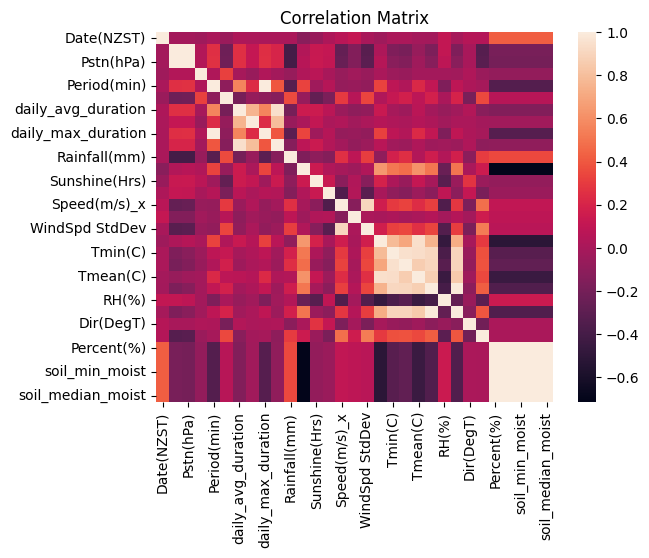

In [79]:
# Correlation Analysis
correlation_matrix = auckland_rain.corr()
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

In [80]:
# Create lag features for prevous 7 days of rainfall and temperature
lag_days = 7
for i in range(1, lag_days + 1):
    auckland_rain[f'nextday_rainfall{i}'] = auckland_rain['Rainfall(mm)'].shift(i)
    auckland_rain[f'nextday_Tmean(C){i}'] = auckland_rain['Tmean(C)'].shift(i)
    auckland_rain[f'nextday_Tmax(C){i}'] = auckland_rain['Tmax(C)'].shift(i)
    auckland_rain[f'nextday_Tmin(C){i}'] = auckland_rain['Tmin(C)'].shift(i)

# Drop rows with NaN values due to lag features
auckland_rain.dropna(inplace=True)

auckland_rain.head(10)

,Date(NZST),Pmsl(hPa),Pstn(hPa),Amount(mm),Period(min),daily_total_rainfall,daily_avg_duration,daily_min_duration,daily_max_duration,daily_median_duration,...,nextday_Tmax(C)5,nextday_Tmin(C)5,nextday_rainfall6,nextday_Tmean(C)6,nextday_Tmax(C)6,nextday_Tmin(C)6,nextday_rainfall7,nextday_Tmean(C)7,nextday_Tmax(C)7,nextday_Tmin(C)7
7,2019-01-14,1009.6,986.1,0.00,79.8,4.39,20.112500,2.2,79.8,17.60,...,24.8,16.0,0.6,21.8,26.9,16.6,0.0,20.0,25.6,14.3
8,2019-01-19,1014.5,991.2,0.00,7893.1,7.72,294.207143,1.8,7893.1,9.70,...,25.8,14.4,0.0,20.4,24.8,16.0,0.6,21.8,26.9,16.6
9,2019-01-20,1013.2,989.6,0.00,310.2,2.46,71.827273,2.3,850.6,10.85,...,27.2,13.7,0.0,20.1,25.8,14.4,0.0,20.4,24.8,16.0
10,2019-01-21,1008.5,985.1,0.51,13.5,8.27,22.410811,2.6,250.3,9.10,...,26.5,15.8,1.6,20.5,27.2,13.7,0.0,20.1,25.8,14.4
11,2019-01-22,1017.3,993.5,0.00,835.9,0.99,225.988889,4.0,1047.6,24.30,...,26.0,10.0,2.2,21.2,26.5,15.8,1.6,20.5,27.2,13.7
12,2019-01-23,1010.7,987.5,0.17,27.0,21.56,21.660000,0.7,445.9,2.80,...,22.2,10.5,0.0,18.0,26.0,10.0,2.2,21.2,26.5,15.8
13,2019-01-28,1016.0,993.0,0.00,6682.3,1.70,960.642857,1.7,6682.3,4.80,...,28.7,15.0,12.8,16.4,22.2,10.5,0.0,18.0,26.0,10.0
14,2019-02-01,1015.1,991.9,0.00,5869.9,3.00,376.043750,1.8,5869.9,8.70,...,23.9,12.2,0.0,21.9,28.7,15.0,12.8,16.4,22.2,10.5
15,2019-02-08,1025.6,1001.8,0.00,10396.6,0.05,5203.950000,11.3,10396.6,5203.95,...,20.7,12.9,8.6,18.1,23.9,12.2,0.0,21.9,28.7,15.0
16,2019-02-09,1019.9,996.4,0.00,269.6,1.45,43.600000,1.8,269.6,12.05,...,17.5,11.6,9.0,16.8,20.7,12.9,8.6,18.1,23.9,12.2


In [81]:
auckland_rain.columns

Index(['Date(NZST)', 'Pmsl(hPa)', 'Pstn(hPa)', 'Amount(mm)', 'Period(min)',
       'daily_total_rainfall', 'daily_avg_duration', 'daily_min_duration',
       'daily_max_duration', 'daily_median_duration', 'Rainfall(mm)',
       'Deficit(mm)', 'Sunshine(Hrs)', 'WindDir(DegT)', 'Speed(m/s)_x',
       'WindDir StdDev', 'WindSpd StdDev', 'Tmax(C)', 'Tmin(C)', 'Tgmin(C)',
       'Tmean(C)', 'Twet(C)', 'RH(%)', 'Tdew(C)', 'Dir(DegT)', 'Speed(m/s)_y',
       'Percent(%)', 'soil_avg_moist', 'soil_min_moist', 'soil_max_moist',
       'soil_median_moist', 'nextday_rainfall1', 'nextday_Tmean(C)1',
       'nextday_Tmax(C)1', 'nextday_Tmin(C)1', 'nextday_rainfall2',
       'nextday_Tmean(C)2', 'nextday_Tmax(C)2', 'nextday_Tmin(C)2',
       'nextday_rainfall3', 'nextday_Tmean(C)3', 'nextday_Tmax(C)3',
       'nextday_Tmin(C)3', 'nextday_rainfall4', 'nextday_Tmean(C)4',
       'nextday_Tmax(C)4', 'nextday_Tmin(C)4', 'nextday_rainfall5',
       'nextday_Tmean(C)5', 'nextday_Tmax(C)5', 'nextday_Tmin(C)

In [82]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = auckland_rain[['Pmsl(hPa)', 'Pstn(hPa)', 'Amount(mm)', 'Period(min)',
       'daily_total_rainfall', 'daily_avg_duration', 'daily_min_duration',
       'daily_max_duration', 'daily_median_duration', 'Rainfall(mm)',
       'Deficit(mm)', 'Sunshine(Hrs)', 'WindDir(DegT)', 'Speed(m/s)_x',
       'WindDir StdDev', 'WindSpd StdDev', 'Tmax(C)', 'Tmin(C)', 'Tgmin(C)',
       'Tmean(C)', 'Twet(C)', 'RH(%)', 'Tdew(C)', 'Dir(DegT)', 'Speed(m/s)_y',
       'Percent(%)', 'soil_avg_moist', 'soil_min_moist', 'soil_max_moist',
       'soil_median_moist', 'nextday_Tmean(C)1',
       'nextday_Tmax(C)1', 'nextday_Tmin(C)1', 'nextday_rainfall2',
       'nextday_Tmean(C)2', 'nextday_Tmax(C)2', 'nextday_Tmin(C)2',
       'nextday_rainfall3', 'nextday_Tmean(C)3', 'nextday_Tmax(C)3',
       'nextday_Tmin(C)3', 'nextday_rainfall4', 'nextday_Tmean(C)4',
       'nextday_Tmax(C)4', 'nextday_Tmin(C)4', 'nextday_rainfall5',
       'nextday_Tmean(C)5', 'nextday_Tmax(C)5', 'nextday_Tmin(C)5',
       'nextday_rainfall6', 'nextday_Tmean(C)6', 'nextday_Tmax(C)6',
       'nextday_Tmin(C)6', 'nextday_rainfall7', 'nextday_Tmean(C)7',
       'nextday_Tmax(C)7', 'nextday_Tmin(C)7']]

# Use the lag features for X
for i in range(1, lag_days + 1):
    X = pd.concat([X, auckland_rain[[f'nextday_rainfall{i}', f'nextday_Tmean(C){i}', f'nextday_Tmax(C){i}', f'nextday_Tmin(C){i}']]], axis=1)

# Define the target variable (next day's rainfall)
y = auckland_rain['nextday_rainfall1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# XGBoost Model

In [83]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
print(f'XGBoost RMSE: {xgb_rmse}')

c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

ValueError: feature_names must be unique. Duplicates found: ['nextday_Tmax(C)1', 'nextday_Tmax(C)2', 'nextday_Tmax(C)3', 'nextday_Tmax(C)4', 'nextday_Tmax(C)5', 'nextday_Tmax(C)6', 'nextday_Tmax(C)7', 'nextday_Tmean(C)1', 'nextday_Tmean(C)2', 'nextday_Tmean(C)3', 'nextday_Tmean(C)4', 'nextday_Tmean(C)5', 'nextday_Tmean(C)6', 'nextday_Tmean(C)7', 'nextday_Tmin(C)1', 'nextday_Tmin(C)2', 'nextday_Tmin(C)3', 'nextday_Tmin(C)4', 'nextday_Tmin(C)5', 'nextday_Tmin(C)6', 'nextday_Tmin(C)7', 'nextday_rainfall2', 'nextday_rainfall3', 'nextday_rainfall4', 'nextday_rainfall5', 'nextday_rainfall6', 'nextday_rainfall7']

In [ ]:
# Predict rainfall for tomorrow using the XGBoost model
xgb_predict_tomorrow = xgb_model.predict(X_train)
xgb_predict_day_after_tomorrow = xgb_model.predict(X_train)
xgb_predict_two_days_after_tomorrow = xgb_model.predict(X_train)

# Print the predictions
print(f'Random Forest Prediction for tomorrow: {xgb_predict_tomorrow[0]} mm')
print(f'Random Forest Prediction for the day after tomorrow: {xgb_predict_day_after_tomorrow[0]} mm')
print(f'Random Forest Prediction for two days after tomorrow: {xgb_predict_day_after_tomorrow[0]} mm')

NotFittedError: need to call fit or load_model beforehand

In [ ]:
# Calculate monthly median rainfall
monthly_median_rainfall = auckland_rain.groupby(auckland_rain['date'].dt.month)['rainfall(mm)'].median()

# Calculate the percentage of actual rainfall compared to the monthly median
auckland_rain['rainfall_percentage'] = (auckland_rain['rainfall(mm)'] / monthly_median_rainfall[auckland_rain['date'].dt.month].values) * 100

# Create a function to categorize the weather conditions
def categorize_rainfall_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"

# Apply the categorization function to create a new column with the weather condition
auckland_rain['weather_condition'] = auckland_rain['rainfall_percentage'].apply(categorize_rainfall_condition)

# Print the resulting dataframe with weather conditions
print(auckland_rain[['date', 'rainfall(mm)', 'rainfall_percentage', 'weather_condition']])


KeyError: 'date'